# Задание 1

Определите максимально правдоподобное распределение для наших даных. Попробуйте это сделать на случайной выборке из экспрессий 30 других генов. Согласованный ли получился результат?

In [32]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 5.0 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=310199 sha256=8b7e88a68be7998a20cd92dcca927b42867ad8f288f2aa4fcdf320f94674866a
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [33]:
# Загрузка R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [34]:
# Установка нужных пакетов
!Rscript -e 'install.packages("fitdistrplus", repos="https://cloud.r-project.org")'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/fitdistrplus_1.1-8.tar.gz'
Content type 'application/x-gzip' length 2434918 bytes (2.3 MB)
downloaded 2.3 MB

* installing *source* package ‘fitdistrplus’ ...
** package ‘fitdistrplus’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (fitdistrplus)

The downloaded source packages are in
	‘/tmp/RtmpAp28zD/downloaded_packages’


In [ ]:
!gdown 1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg

Downloading...
From: https://drive.google.com/uc?id=1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg
To: /content/LUAD_counts.tsv
100% 3.18M/3.18M [00:00<00:00, 182MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Настройка отображения
plt.rcParams["figure.dpi"] = 100

# Прочтение датасета
df = pd.read_csv("LUAD_counts.tsv", sep="\t")
df.index = [gene.split(".")[0] for gene in df.gene_name]
del df["gene_name"]
df = df.T

In [ ]:
df

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ACTL10,AC119733,AC020765,AC010980,AC004233,AL451106,AC008763,AC006486,AL391628,AP006621
sample_0,4275,0,1071,630,542,372,10445,6760,31744,2022,...,0,0,0,11,0,0,0,0,6,10
sample_1,1536,0,765,510,172,911,4290,1097,807,1043,...,0,0,0,15,1,0,1,0,6,9
sample_2,5009,13,2731,919,321,2299,9368,3812,2704,2496,...,0,0,0,36,2,0,0,0,15,18
sample_3,1889,0,1941,548,301,879,5994,2310,2552,1332,...,0,0,1,17,0,0,0,0,3,22
sample_4,1329,0,1395,297,320,387,6215,3142,685,1676,...,0,0,0,9,3,0,0,0,2,9
sample_5,1194,1,1812,489,617,951,1951,1612,7993,1453,...,0,0,0,129,0,0,0,0,4,9
sample_6,1443,0,1275,230,104,930,2113,1337,285,542,...,0,0,0,16,0,0,0,0,3,7
sample_7,783,0,783,380,72,2418,3240,1124,626,943,...,0,0,0,13,0,0,1,0,4,4
sample_8,2492,2,3880,1100,204,1036,2755,3045,9484,1577,...,0,0,0,18,0,0,0,0,16,32
sample_9,2366,1,2760,807,1011,491,1478,2423,3581,3010,...,0,0,0,5,0,0,0,0,5,28


Выборка из 30 случайных генов

In [ ]:
random_sample = df.sample(n=30,axis='columns')

In [ ]:
random_sample

,SMC4,DRAM2,PRR7,DDAH2,ABL2,TMEM167B,TBC1D17,SCIMP,MBNL2,S100A12,...,H4C15,NPIPB9,SPOCK2,TMEM268,HERC6,CELF2,LILRB4,CCDC59,IFNB1,PTH1R
sample_0,2331,3488,63,4323,1042,1683,1345,33,1318,167,...,0,0,930,557,1135,506,298,1392,0,38
sample_1,985,1735,28,1477,1446,1793,1014,977,2260,26,...,0,0,8910,1161,676,4275,1880,506,0,152
sample_2,1749,3711,183,5774,1641,4224,3263,637,6815,12,...,0,0,2648,1333,1641,4993,2994,1718,1,233
sample_3,1880,1694,99,1863,1791,2702,1915,579,3343,17,...,0,2,3565,2102,1287,2729,2910,1070,2,63
sample_4,1657,960,80,2410,2500,1460,1215,169,2851,14,...,2,0,1385,868,3260,1122,1458,939,11,96
sample_5,5102,1452,122,1590,1910,1771,1263,473,2428,4,...,0,1,2011,1337,368,1310,4129,1002,0,55
sample_6,383,1761,42,1110,601,1442,1329,184,1667,108,...,3,0,1584,577,1901,2546,608,612,0,34
sample_7,1071,1433,12,1901,1275,2100,1463,599,3128,98,...,0,1,26162,762,722,6448,1694,592,0,220
sample_8,1418,4633,324,2130,3588,4044,4807,219,7551,94,...,1,12,3958,2608,1244,9959,679,1404,0,127
sample_9,7276,1017,479,5590,2799,2250,2461,114,1544,21,...,5,0,643,2153,614,326,3347,1922,2,58


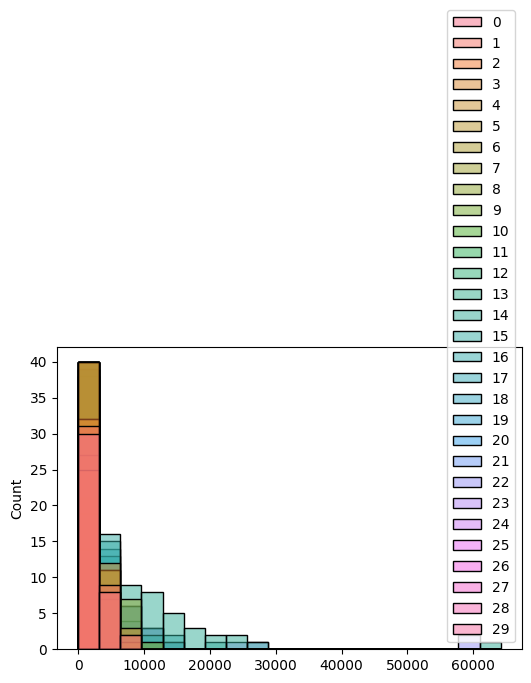

In [ ]:
expr = np.array(random_sample)
sns.histplot(expr, bins=20)

In [ ]:
from scipy.stats import shapiro

for gene in random_sample:
  stat, p = shapiro(random_sample[gene])
  print(f"Gene={gene}: Statistics={stat:3f}, p={p:3f}")

Gene=SMC4: Statistics=0.847243, p=0.000077
Gene=DRAM2: Statistics=0.939479, p=0.033212
Gene=PRR7: Statistics=0.874750, p=0.000381
Gene=DDAH2: Statistics=0.916110, p=0.005823
Gene=ABL2: Statistics=0.948701, p=0.068418
Gene=TMEM167B: Statistics=0.883919, p=0.000673
Gene=TBC1D17: Statistics=0.852877, p=0.000106
Gene=SCIMP: Statistics=0.879818, p=0.000520
Gene=MBNL2: Statistics=0.869689, p=0.000281
Gene=S100A12: Statistics=0.774662, p=0.000002
Gene=AC139530: Statistics=1.000000, p=1.000000
Gene=TAT: Statistics=0.685822, p=0.000000
Gene=GNPNAT1: Statistics=0.845773, p=0.000071
Gene=ZFYVE1: Statistics=0.896949, p=0.001560
Gene=GRINA: Statistics=0.668589, p=0.000000
Gene=LPGAT1: Statistics=0.833728, p=0.000037
Gene=DAB2IP: Statistics=0.831949, p=0.000034
Gene=TMEM181: Statistics=0.745921, p=0.000001
Gene=DCAF11: Statistics=0.880327, p=0.000537
Gene=HEYL: Statistics=0.851756, p=0.000099
Gene=H4C15: Statistics=0.611052, p=0.000000
Gene=NPIPB9: Statistics=0.673464, p=0.000000
Gene=SPOCK2: Statis

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
means = np.mean(random_sample.values, axis=0)
vars = np.var(random_sample.values, axis=0)

means = means[vars > 0]
vars = vars[vars > 0]

means = np.log10(means)
vars = np.log10(vars)

Text(0, 0.5, 'log$_{10}$(Variance)')

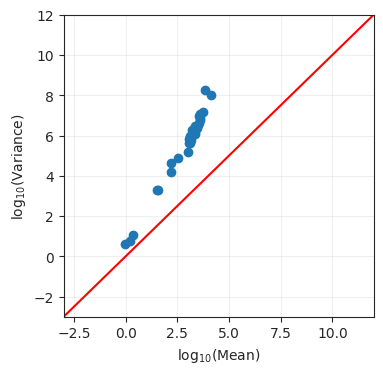

In [ ]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

ax.scatter(means, vars)
ax.plot([-3, 12], [-3, 12], color="red")
ax.set_xlim(-3, 12)
ax.set_ylim(-3, 12)
ax.grid(alpha=0.3)

ax.set_xlabel("log$_{10}$(Mean)")
ax.set_ylabel("log$_{10}$(Variance)")

In [ ]:
%%R -i expr
library(fitdistrplus)

In [ ]:
%%R
data <- as.vector(expr)
fit.norm <- fitdist(data, "norm")
summary(fit.norm)

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
     estimate Std. Error
mean 2319.193  124.44308
sd   4304.104   88.14987
Loglikelihood:  -11743.52   AIC:  23491.03   BIC:  23501.21 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1



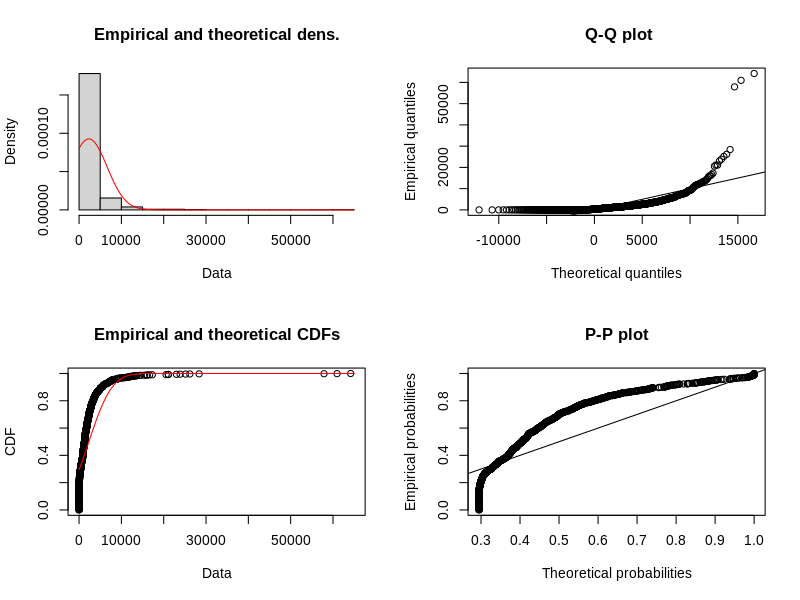

In [ ]:
%%R -r 100 -w 800 -h 600
plot(fit.norm)

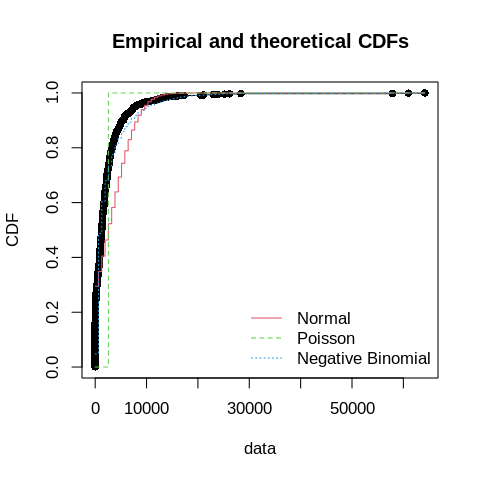

In [ ]:
%%R -r 100
fit_n  <- fitdist(data, "norm")
fit_p  <- fitdist(data, "pois")
fit_nb  <- fitdist(data, "nbinom")
# fit_ln  <- fitdist(data, "lnorm")

# cdfcomp(list(fit_n, fit_p, fit_nb, fit_ln), legendtext = c("Normal", "Poisson", "Negative Binomial", "Log-Normal"))
cdfcomp(list(fit_n, fit_p, fit_nb), legendtext = c("Normal", "Poisson", "Negative Binomial"))

In [ ]:
%%R
summary(fit.norm)

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
     estimate Std. Error
mean 2319.193  124.44308
sd   4304.104   88.14987
Loglikelihood:  -11743.52   AIC:  23491.03   BIC:  23501.21 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1



In [ ]:
%%R
summary(fit_p)

Fitting of the distribution ' pois ' by maximum likelihood 
Parameters : 
       estimate Std. Error
lambda 2319.193   1.390298
Loglikelihood:  -2311848   AIC:  4623698   BIC:  4623703 


In [ ]:
%%R
# summary(fit_ln)

NULL


In [ ]:
%%R
summary(fit_nb)

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
         estimate   Std. Error
size    0.3444915   0.01204032
mu   2320.1676251 114.40902634
Loglikelihood:  -9870.59   AIC:  19745.18   BIC:  19755.36 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0002988042
mu   -0.0002988042  1.0000000000



Лучше всего для случайной выборки из 30 генов подходит отрицательное биномиальное и лог-нормальное распределения. Данные распределения имеют одни из самых низких AIC-метрик для данной выборки. Следовательно данные распределения лучше всего описывают поведение исходных данных.

# Задание 2

Скачайте датасет <code>1M8-86VecaYPERovPk4JKhT2lLa4PfJxi</code> из статьи <a href="https://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-13-304#Sec8">Oberg et al., 2012</a>. Внимательно прочитайте статью и изучите дизайн эксперимента &mdash; какие реплики в статье называют техническими, а какие &mdash; биологическими? Правда ли в технических репликах наблюдается распределение Пуассона?

# Решение

В данной статье техническими репликами являются: две аликвоты одной и той же библиотеки загружены в разные проточные ячейки секвенатора. 

Биологическими: 
* библиотека составлена на основе человеских образцов либо образцов других животных; 
* библиотека получена из клеточной линии определенного типа клеток либо из образца ткани.

Распределение Пуассона обычно наблюдается в технических репликах. А у биологических реплик наблюдается распределение Пуассона с овердисперсией (Over-dispersion Poisson distribution) и отрицательное биномиальное распределение (NB-distribution).

In [1]:
!gdown 1M8-86VecaYPERovPk4JKhT2lLa4PfJxi

Downloading...
From: https://drive.google.com/uc?id=1M8-86VecaYPERovPk4JKhT2lLa4PfJxi
To: /content/GSE29022_gene_counts.txt
100% 2.76M/2.76M [00:00<00:00, 55.3MB/s]


In [32]:
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!tar -xvf drive/MyDrive/library.tar.gz
!cp -r /content/usr/local/lib/R /usr/local/lib/
!rm -r usr

In [31]:
# Установка нужных пакетов
!Rscript -e 'install.packages("fitdistrplus", repos="https://cloud.r-project.org")'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/fitdistrplus_1.1-8.tar.gz'
Content type 'application/x-gzip' length 2434918 bytes (2.3 MB)
downloaded 2.3 MB

* installing *source* package ‘fitdistrplus’ ...
** package ‘fitdistrplus’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (fitdistrplus)

The downloaded source packages are in
	‘/tmp/RtmpNyHJFh/downloaded_packages’


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Настройка отображения
plt.rcParams["figure.dpi"] = 100

# Прочтение датасета
data = pd.read_csv('GSE29022_gene_counts.txt', sep="\t")
data = data.T

In [35]:
data

,0,1,2,3,4,5,6,7,8,9,...,17343,17344,17345,17346,17347,17348,17349,17350,17351,17352
sample4019.flowcell30WPLAAXX.lane5,785,527,3,117,30,14,1,1799,46,50,...,103,0,6,49,0,20,165,0,25,220
sample4019.flowcell30WPLAAXX.lane6,761,501,2,129,30,11,3,1873,43,37,...,102,0,9,50,0,15,196,0,30,218
sample6045.flowcell30WP5AAXX.lane1,794,466,3,80,19,0,6,1813,48,25,...,181,0,16,53,0,8,214,0,32,169
sample6045.flowcell30WP5AAXX.lane2,888,581,1,71,34,3,6,1962,64,23,...,219,0,26,59,0,16,205,0,18,162
sample2550.flowcell305TMAAXX.lane3,873,259,1,61,16,8,0,1778,39,5,...,118,0,11,17,0,10,115,0,38,169
sample2550.flowcell305TMAAXX.lane4,836,259,1,52,21,4,4,1816,37,10,...,135,0,17,13,0,6,125,1,37,161
sample1286.flowcell305TMAAXX.lane7,930,321,2,74,15,10,0,1907,40,28,...,114,0,6,37,1,10,120,0,20,185
sample1286.flowcell305TMAAXX.lane8,874,361,2,70,24,7,1,1668,37,24,...,110,0,7,24,0,15,137,0,20,174
sample6113.flowcell30WFYAAXX.lane3,1053,381,2,55,16,9,4,2230,42,24,...,168,0,32,44,0,19,168,0,52,283
sample6113.flowcell30WFYAAXX.lane4,1050,391,3,74,21,6,2,2211,39,16,...,159,0,46,34,0,17,180,0,46,265


In [46]:
random_sample = data.sample(n=30,axis='columns')

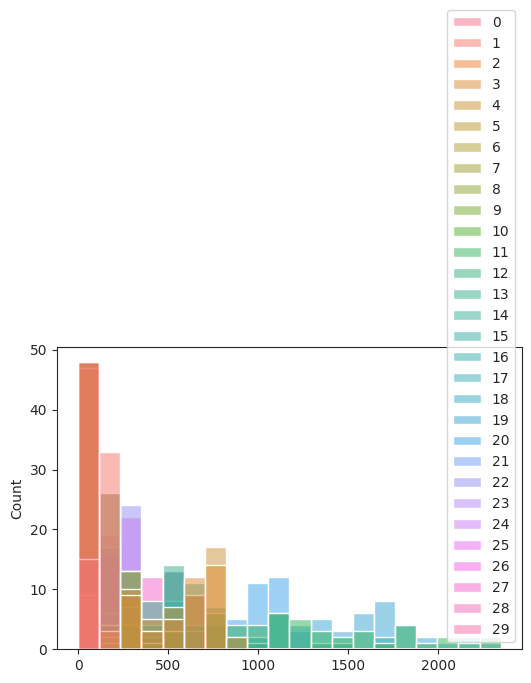

In [48]:
expr = np.array(random_sample)
sns.histplot(expr, bins=20)

In [50]:
from scipy.stats import shapiro

for gene in random_sample:
  stat, p = shapiro(random_sample[gene])
  print(f"Gene={gene}: Statistics={stat:3f}, p={p:3f}")

Gene=11824: Statistics=0.938676, p=0.014438
Gene=12208: Statistics=0.958855, p=0.090748
Gene=15159: Statistics=0.949280, p=0.037434
Gene=13786: Statistics=0.903197, p=0.000799
Gene=14773: Statistics=0.901810, p=0.000720
Gene=9851: Statistics=0.951008, p=0.043862
Gene=17002: Statistics=0.947272, p=0.031171
Gene=3179: Statistics=0.982287, p=0.676131
Gene=228: Statistics=0.958014, p=0.083914
Gene=5957: Statistics=0.673062, p=0.000000
Gene=3128: Statistics=0.622945, p=0.000000
Gene=3689: Statistics=0.958588, p=0.088520
Gene=6887: Statistics=0.952545, p=0.050535
Gene=124: Statistics=0.910052, p=0.001349
Gene=12190: Statistics=0.129158, p=0.000000
Gene=4366: Statistics=0.916192, p=0.002188
Gene=16586: Statistics=0.525277, p=0.000000
Gene=2106: Statistics=0.844159, p=0.000015
Gene=16523: Statistics=0.978211, p=0.506491
Gene=10547: Statistics=0.940888, p=0.017559
Gene=13275: Statistics=0.925282, p=0.004588
Gene=15405: Statistics=0.824896, p=0.000005
Gene=8851: Statistics=0.964857, p=0.158493
G

In [51]:
means = np.mean(random_sample.values, axis=0)
vars = np.var(random_sample.values, axis=0)

means = means[vars > 0]
vars = vars[vars > 0]

means = np.log10(means)
vars = np.log10(vars)

Text(0, 0.5, 'log$_{10}$(Variance)')

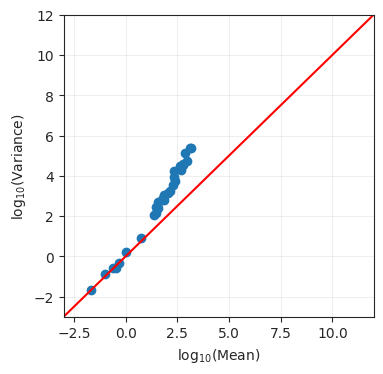

In [52]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

ax.scatter(means, vars)
ax.plot([-3, 12], [-3, 12], color="red")
ax.set_xlim(-3, 12)
ax.set_ylim(-3, 12)
ax.grid(alpha=0.3)

ax.set_xlabel("log$_{10}$(Mean)")
ax.set_ylabel("log$_{10}$(Variance)")

In [53]:
%%R -i expr
library(fitdistrplus)

In [54]:
%%R
data <- as.vector(expr)
fit.norm <- fitdist(data, "norm")
summary(fit.norm)

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
     estimate Std. Error
mean 261.1403  10.664557
sd   404.6904   7.540981
Loglikelihood:  -10687.77   AIC:  21379.54   BIC:  21390.08 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1



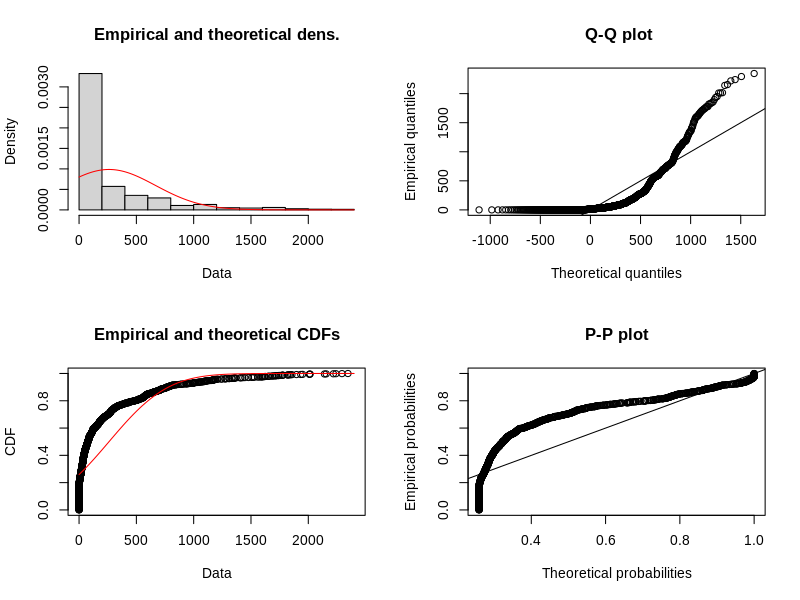

In [55]:
%%R -r 100 -w 800 -h 600
plot(fit.norm)

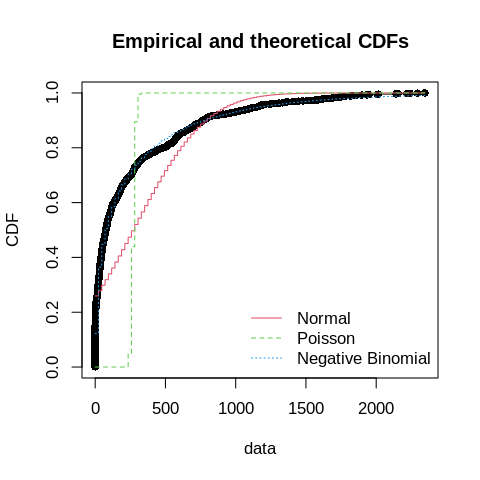

In [57]:
%%R -r 100
fit_n  <- fitdist(data, "norm")
fit_p  <- fitdist(data, "pois")
fit_nb  <- fitdist(data, "nbinom")
# fit_ln  <- fitdist(data, "lnorm")

# dfcomp(list(fit_n, fit_p, fit_nb, fit_ln), legendtext = c("Normal", "Poisson", "Negative Binomial", "Log-Normal"))
cdfcomp(list(fit_n, fit_p, fit_nb), legendtext = c("Normal", "Poisson", "Negative Binomial"))

In [58]:
%%R
summary(fit.norm)

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
     estimate Std. Error
mean 261.1403  10.664557
sd   404.6904   7.540981
Loglikelihood:  -10687.77   AIC:  21379.54   BIC:  21390.08 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1



In [59]:
%%R
summary(fit_p)

Fitting of the distribution ' pois ' by maximum likelihood 
Parameters : 
       estimate Std. Error
lambda 261.1403  0.4258492
Loglikelihood:  -341689.3   AIC:  683380.7   BIC:  683386 


In [60]:
%%R
summary(fit_nb)

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
        estimate  Std. Error
size   0.3119803  0.01042506
mu   261.2691297 12.34003250
Loglikelihood:  -8627.308   AIC:  17258.62   BIC:  17269.16 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0003488429
mu   -0.0003488429  1.0000000000



# Задание 3

Проделайте подобную процедуру с каунтами генов, которые вы получили в результате анализа <a href="https://www.nature.com/articles/s41598-018-23226-4">статьи</a> со сравнением методов подготовки библиотек для scRNA-Seq (`1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek`). Разберитесь, что в случае этой работы называют технической репликой. Актуально ли распределение Пуассона в случае таких технических реплик?

# Решение

Техническими репликами в данном исследовании являются polyA и total (rRNA depletion) протоколы, а также РНК, выделенная из крови и ткани кишечника.

В случае данных технических реплик больше подходит отрицательное биномиальное распределение нежели распределение Пуассона.

In [61]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!gdown 1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek

Downloading...
From: https://drive.google.com/uc?id=1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek
To: /content/polyA_total_counts.tsv
100% 1.87M/1.87M [00:00<00:00, 156MB/s]


In [2]:
%load_ext rpy2.ipython

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

# Настройка отображения
plt.rcParams["figure.dpi"] = 100

# Прочтение датасета
df = pd.read_csv("polyA_total_counts.tsv", sep="\t")
df.rename(columns={ df.columns[0]: "gene_name" }, inplace = True)
df.index = [gene.split(".")[0] for gene in df.gene_name]
del df["gene_name"]
df = df.T
df

,MAFIP,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,...,PRY,BPY2,DAZ1,DAZ2,CDY1B,BPY2B,DAZ3,DAZ4,BPY2C,CDY1
colon_polyA_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,148,0,0,0,0
colon_polyA_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
colon_polyA_1,0,0,0,0,0,0,0,0,0,0,...,0,26,0,0,0,0,0,0,63,0
colon_polyA_2,0,0,0,0,0,0,0,0,0,0,...,0,0,74,0,0,0,0,0,0,0
colon_total_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
colon_total_4,0,0,0,0,0,0,0,0,0,0,...,117,0,0,0,0,0,0,0,0,0
colon_total_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
colon_total_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pbmc_polyA_3,0,0,0,0,0,0,0,0,0,0,...,1011,76,560,158,0,34,107,46,279,527
pbmc_polyA_4,0,0,0,0,0,0,0,0,0,0,...,934,76,736,207,0,142,180,206,145,301


In [99]:
# random_sample = df.sample(n=100,axis='columns')
random_sample = df

In [101]:
expr = np.array(random_sample)
# sns.histplot(expr, bins=20)

In [ ]:
from scipy.stats import shapiro

for gene in random_sample:
  stat, p = shapiro(random_sample[gene])
  print(f"Gene={gene}: Statistics={stat:3f}, p={p:3f}")

In [121]:
means = np.mean(random_sample.values, axis=0)
vars = np.var(random_sample.values, axis=0)

means = means[vars > 0]
vars = vars[vars > 0]

means = np.log10(means)
vars = np.log10(vars)

Text(0, 0.5, 'log$_{10}$(Variance)')

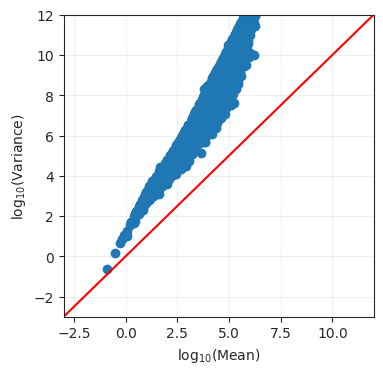

In [122]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

ax.scatter(means, vars)
ax.plot([-3, 12], [-3, 12], color="red")
ax.set_xlim(-3, 12)
ax.set_ylim(-3, 12)
ax.grid(alpha=0.3)

ax.set_xlabel("log$_{10}$(Mean)")
ax.set_ylabel("log$_{10}$(Variance)")

In [123]:
%%R -i expr
library(fitdistrplus)

In [124]:
%%R
data <- as.vector(expr)
fit.norm <- fitdist(data, "norm")
summary(fit.norm)

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean  99695.65   29.30859
sd   633463.31        NaN
Loglikelihood:  -5091399   AIC:  10182802   BIC:  10182823 
Correlation matrix:
     mean  sd
mean    1 NaN
sd    NaN   1



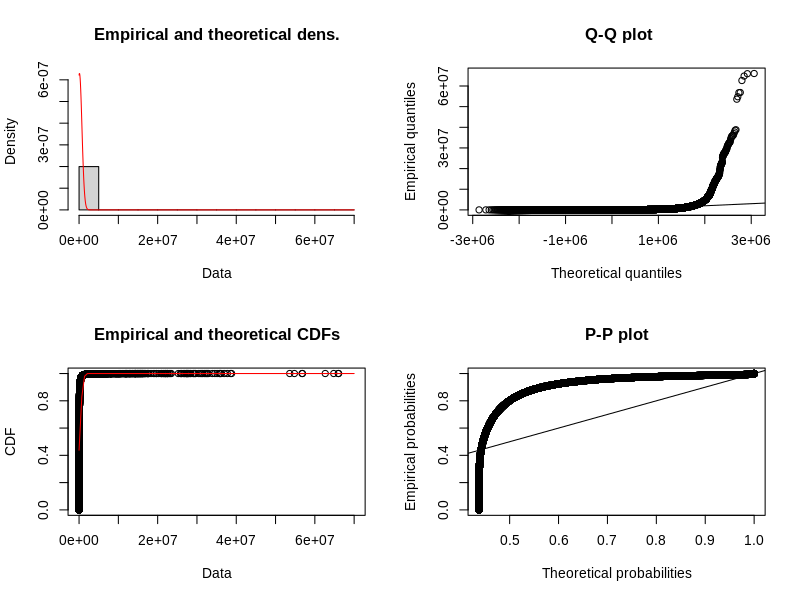

In [125]:
%%R -r 100 -w 800 -h 600
plot(fit.norm)

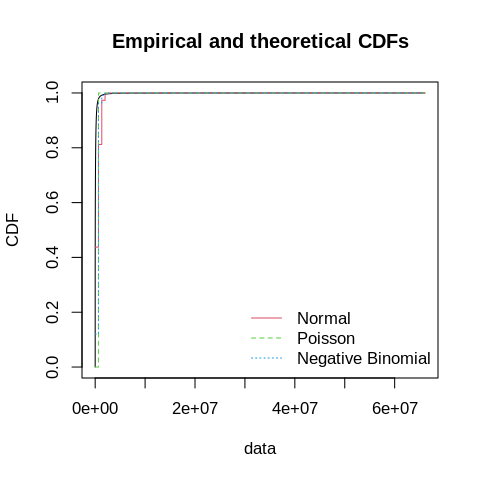

In [126]:
%%R -r 100
fit_n  <- fitdist(data, "norm")
fit_p  <- fitdist(data, "pois")
fit_nb  <- fitdist(data, "nbinom")
# fit_ln  <- fitdist(data, "lnorm")

# cdfcomp(list(fit_n, fit_p, fit_nb, fit_ln), legendtext = c("Normal", "Poisson", "Negative Binomial", "Log-Normal"))
cdfcomp(list(fit_n, fit_p, fit_nb), legendtext = c("Normal", "Poisson", "Negative Binomial"))

In [127]:
%%R
summary(fit.norm)

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean  99695.65   29.30859
sd   633463.31        NaN
Loglikelihood:  -5091399   AIC:  10182802   BIC:  10182823 
Correlation matrix:
     mean  sd
mean    1 NaN
sd    NaN   1



In [128]:
%%R
summary(fit_p)

Fitting of the distribution ' pois ' by maximum likelihood 
Parameters : 
       estimate Std. Error
lambda 99695.65  0.3620387
Loglikelihood:  -65088114734   AIC:  130176229471   BIC:  130176229481 


In [129]:
%%R
summary(fit_nb)

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
         estimate   Std. Error
size 1.585439e-01 3.267156e-04
mu   9.969978e+04 3.783723e+01
Loglikelihood:  -3580135   AIC:  7160275   BIC:  7160296 
Correlation matrix:
              size            mu
size  1.000000e+00 -8.634766e-06
mu   -8.634766e-06  1.000000e+00



In [86]:
%%R

# summary(fit_ln)

NULL


Лучшую AIC-метрику имеет NB-распределение, нежели распределение Пуассона.